## Final Project -- The Continuing Impact of COVID-19
#### Katie Fasola

For my final project, I decided to analyze relationships between countries regarding the trends of the novel coronavirus.  
I was hesitant to choose this topic due to its 'popularity'; however, I am curious in the subject as it is constantly evolving.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import altair as alt
import networkx
import numpy as np
import os
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.getcwd()

'C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project'

In [3]:
os.chdir('C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project\\data')
os.getcwd()

'C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project\\data'

In [4]:
globalcases_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
globalcases_covid.drop(globalcases_covid.columns.difference(['Country/Region', '4/7/2020']), axis=1, inplace=True)
globalcases_covid

,Country/Region,4/7/2020
0,Afghanistan,423
1,Albania,383
2,Algeria,1468
3,Andorra,545
4,Angola,17
...,...,...
258,United Kingdom,2
259,France,1
260,South Sudan,2
261,Western Sahara,4


In [5]:
globalcases_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
globalcases_covid.drop(globalcases_covid.columns.difference(['Country/Region', '4/7/2020']), axis=1, inplace=True)
globalcases_covid['Total Cases'] = globalcases_covid.sum(1)
globalcases_covid

,Country/Region,4/7/2020,Total Cases
0,Afghanistan,423,423
1,Albania,383,383
2,Algeria,1468,1468
3,Andorra,545,545
4,Angola,17,17
...,...,...,...
258,United Kingdom,2,2
259,France,1,1
260,South Sudan,2,2
261,Western Sahara,4,4


In [6]:
global_top10_cases = globalcases_covid.sort_values('Total Cases', ascending=False).head(10)
global_top10_cases

,Country/Region,4/7/2020,Total Cases
225,United States,396223,396223
201,Spain,141942,141942
137,Italy,135586,135586
116,France,109069,109069
120,Germany,107663,107663
62,China,67803,67803
133,Iran,62589,62589
223,United Kingdom,55242,55242
213,Turkey,34109,34109
206,Switzerland,22253,22253


In [7]:
plt.style.use('fivethirtyeight')

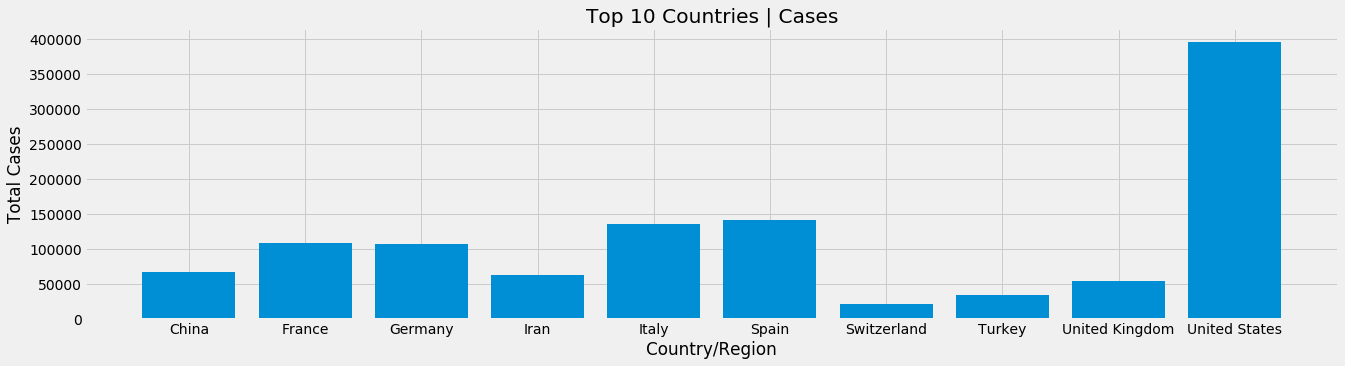

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Cases', data=global_top10_cases.groupby('Country/Region', as_index=False).sum())
plt.title('Top 10 Countries | Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Cases');

In [9]:
globalcases_covid_final = globalcases_covid.groupby('Country/Region').agg( {'Total Cases': ['sum']} )
globalcases_covid_final

,Total Cases
,sum
Country/Region,
Afghanistan,423
Albania,383
Algeria,1468
Andorra,545
Angola,17
...,...
Vietnam,249
West Bank and Gaza,261


In [10]:
globalcases_covid_final[('Total Cases', 'sum')].describe()

count       184.000000
mean       7750.521739
std       35157.161835
min           1.000000
25%          25.750000
50%         327.000000
75%        1863.000000
max      396223.000000
Name: (Total Cases, sum), dtype: float64

In [11]:
globaldeaths_covid = pd.read_csv('time_series_covid19_deaths_global.csv')
globaldeaths_covid.drop(globaldeaths_covid.columns.difference(['Country/Region', '4/7/2020']), axis=1, inplace=True)
globaldeaths_covid['Total Deaths'] = globaldeaths_covid.sum(1)
globaldeaths_covid

,Country/Region,4/7/2020,Total Deaths
0,Afghanistan,14,14
1,Albania,22,22
2,Algeria,193,193
3,Andorra,22,22
4,Angola,2,2
...,...,...,...
258,United Kingdom,0,0
259,France,0,0
260,South Sudan,0,0
261,Western Sahara,0,0


In [12]:
global_top10_deaths = globaldeaths_covid.sort_values('Total Deaths', ascending=False).head(10)
global_top10_deaths

,Country/Region,4/7/2020,Total Deaths
137,Italy,17127,17127
201,Spain,14045,14045
225,United States,12722,12722
116,France,10328,10328
223,United Kingdom,6159,6159
133,Iran,3872,3872
62,China,3212,3212
169,Netherlands,2101,2101
23,Belgium,2035,2035
120,Germany,2016,2016


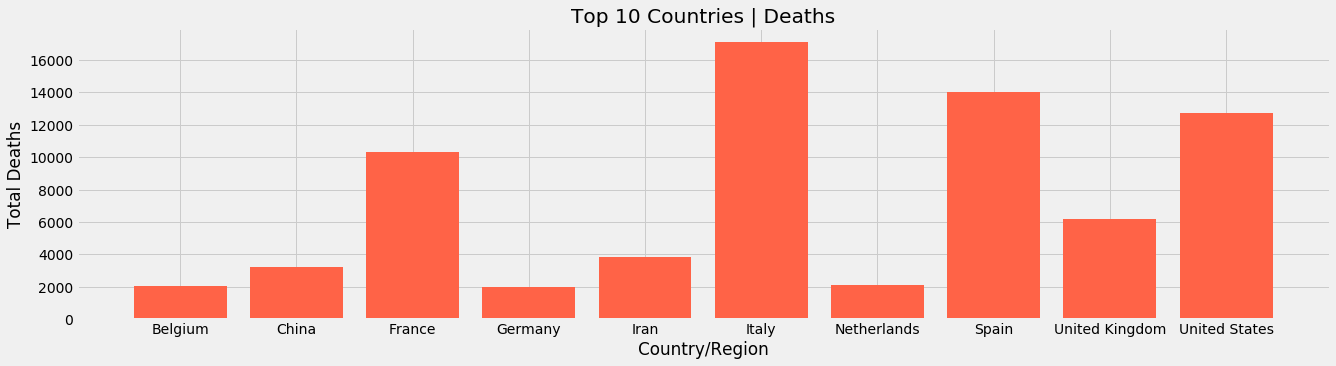

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Deaths', data=global_top10_deaths.groupby('Country/Region', as_index=False).sum(), color='tomato')
plt.title('Top 10 Countries | Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Total Deaths');

In [14]:
globaldeaths_covid_final = globaldeaths_covid.groupby('Country/Region').agg( {'Total Deaths': ['sum']} )
globaldeaths_covid_final

,Total Deaths
,sum
Country/Region,
Afghanistan,14
Albania,22
Algeria,193
Andorra,22
Angola,2
...,...
Vietnam,0
West Bank and Gaza,1


In [15]:
globaldeaths_covid_final[('Total Deaths', 'sum')].describe()

count      184.000000
mean       444.918478
std       2094.330601
min          0.000000
25%          1.000000
50%          6.000000
75%         45.500000
max      17127.000000
Name: (Total Deaths, sum), dtype: float64

In [16]:
globalrecovered_covid = pd.read_csv('time_series_covid19_recovered_global.csv')
globalrecovered_covid.drop(globalrecovered_covid.columns.difference(['Country/Region', '4/7/2020']), axis=1, inplace=True)
globalrecovered_covid['Total Recovered'] = globalrecovered_covid.sum(1)
globalrecovered_covid

,Country/Region,4/7/2020,Total Recovered
0,Afghanistan,18,18
1,Albania,131,131
2,Algeria,113,113
3,Andorra,39,39
4,Angola,2,2
...,...,...,...
244,United Kingdom,0,0
245,France,0,0
246,South Sudan,0,0
247,Western Sahara,0,0


In [17]:
global_top10_recovered = globalrecovered_covid.sort_values('Total Recovered', ascending=False).head(10)
global_top10_recovered

,Country/Region,4/7/2020,Total Recovered
53,China,64073,64073
199,Spain,43208,43208
112,Germany,36081,36081
127,Iran,27039,27039
131,Italy,24392,24392
225,United States,21763,21763
108,France,19337,19337
204,Switzerland,8704,8704
137,"Korea, South",6694,6694
23,Belgium,4157,4157


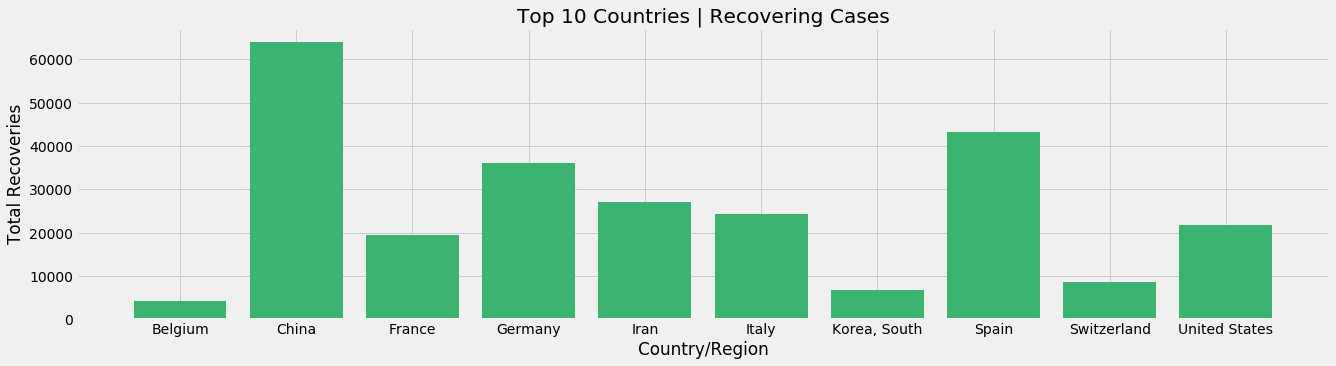

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Recovered', data=global_top10_recovered.groupby('Country/Region', as_index=False).sum(), color='mediumseagreen')
plt.title('Top 10 Countries | Recovering Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Recoveries');

In [19]:
globalrecovered_covid_final = globalrecovered_covid.groupby('Country/Region').agg( {'Total Recovered': ['sum']} )
globalrecovered_covid_final

,Total Recovered
,sum
Country/Region,
Afghanistan,18
Albania,131
Algeria,113
Andorra,39
Angola,2
...,...
Vietnam,123
West Bank and Gaza,42


In [20]:
globalrecovered_covid_final[('Total Recovered', 'sum')].describe()

count      184.000000
mean      1630.728261
std       7766.282055
min          0.000000
25%          2.750000
50%         31.500000
75%        168.250000
max      77410.000000
Name: (Total Recovered, sum), dtype: float64

In [21]:
uscases_covid = pd.read_csv('time_series_covid19_confirmed_US.csv')
uscases_covid.drop(uscases_covid.columns.difference(['Province_State', 'Combined_Key', '4/7/20']), axis=1, inplace=True)
uscases_covid['Total Cases'] = uscases_covid.sum(1)
uscases_covid

,Province_State,Combined_Key,4/7/20,Total Cases
0,American Samoa,"American Samoa, US",0,0
1,Guam,"Guam, US",121,121
2,Northern Mariana Islands,"Northern Mariana Islands, US",6,6
3,Puerto Rico,"Puerto Rico, US",573,573
4,Virgin Islands,"Virgin Islands, US",43,43
...,...,...,...,...
3248,Washington,"Unassigned, Washington, US",677,677
3249,West Virginia,"Unassigned, West Virginia, US",0,0
3250,Wisconsin,"Unassigned, Wisconsin, US",0,0
3251,Wyoming,"Unassigned, Wyoming, US",0,0


In [22]:
us_top10_cases = uscases_covid.sort_values('Total Cases', ascending=False).head(22)
us_top10_cases

,Province_State,Combined_Key,4/7/20,Total Cases
1863,New York,"New York City, New York, US",76876,76876
1862,New York,"Nassau, New York, US",16610,16610
1884,New York,"Suffolk, New York, US",15561,15561
1892,New York,"Westchester, New York, US",14294,14294
1317,Michigan,"Wayne, Michigan, US",9045,9045
615,Illinois,"Cook, Illinois, US",8728,8728
1780,New Jersey,"Bergen, New Jersey, US",7533,7533
209,California,"Los Angeles, California, US",6936,6936
1876,New York,"Rockland, New York, US",5990,5990
1785,New Jersey,"Essex, New Jersey, US",5078,5078


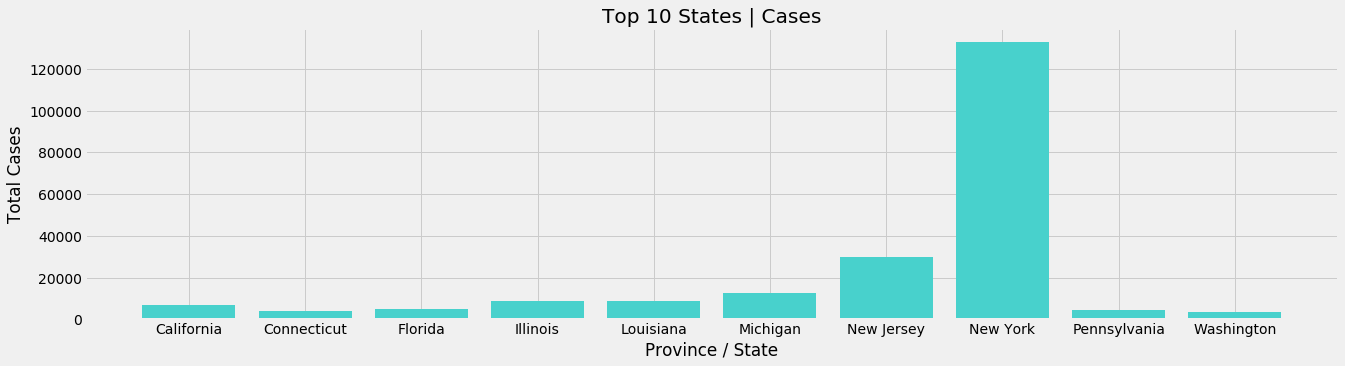

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Province_State','Total Cases', data=us_top10_cases.groupby('Province_State', as_index=False).sum(), color='mediumturquoise')
plt.title('Top 10 States | Cases')
plt.xlabel('Province / State')
plt.ylabel('Total Cases');

In [24]:
uscases_covid_final = uscases_covid.groupby('Province_State').agg( {'Total Cases': ['sum']} )
uscases_covid_final

,Total Cases
,sum
Province_State,
Alabama,2169
Alaska,213
American Samoa,0
Arizona,2870
Arkansas,946
California,17351
Colorado,5429
Connecticut,7781


In [25]:
uscases_covid_final[('Total Cases', 'sum')].describe()

count        58.000000
mean       6831.396552
std       19225.820871
min           0.000000
25%         532.500000
50%        1351.500000
75%        5267.250000
max      139875.000000
Name: (Total Cases, sum), dtype: float64

In [26]:
usdeaths_covid = pd.read_csv('time_series_covid19_deaths_US.csv')
usdeaths_covid.drop(usdeaths_covid.columns.difference(['Province_State', 'Combined_Key', '4/7/20']), axis=1, inplace=True)
usdeaths_covid['Total Deaths'] = usdeaths_covid.sum(1)
usdeaths_covid

,Province_State,Combined_Key,4/7/20,Total Deaths
0,American Samoa,"American Samoa, US",0,0
1,Guam,"Guam, US",4,4
2,Northern Mariana Islands,"Northern Mariana Islands, US",1,1
3,Puerto Rico,"Puerto Rico, US",23,23
4,Virgin Islands,"Virgin Islands, US",1,1
...,...,...,...,...
3248,Washington,"Unassigned, Washington, US",0,0
3249,West Virginia,"Unassigned, West Virginia, US",0,0
3250,Wisconsin,"Unassigned, Wisconsin, US",0,0
3251,Wyoming,"Unassigned, Wyoming, US",0,0


In [27]:
us_top10_deaths = usdeaths_covid.sort_values('Total Deaths', ascending=False).head(26)
us_top10_deaths

,Province_State,Combined_Key,4/7/20,Total Deaths
1863,New York,"New York City, New York, US",4009,4009
1862,New York,"Nassau, New York, US",500,500
1317,Michigan,"Wayne, Michigan, US",402,402
1884,New York,"Suffolk, New York, US",263,263
1780,New Jersey,"Bergen, New Jersey, US",263,263
1785,New Jersey,"Essex, New Jersey, US",232,232
2974,Washington,"King, Washington, US",230,230
1892,New York,"Westchester, New York, US",211,211
615,Illinois,"Cook, Illinois, US",209,209
1298,Michigan,"Oakland, Michigan, US",205,205


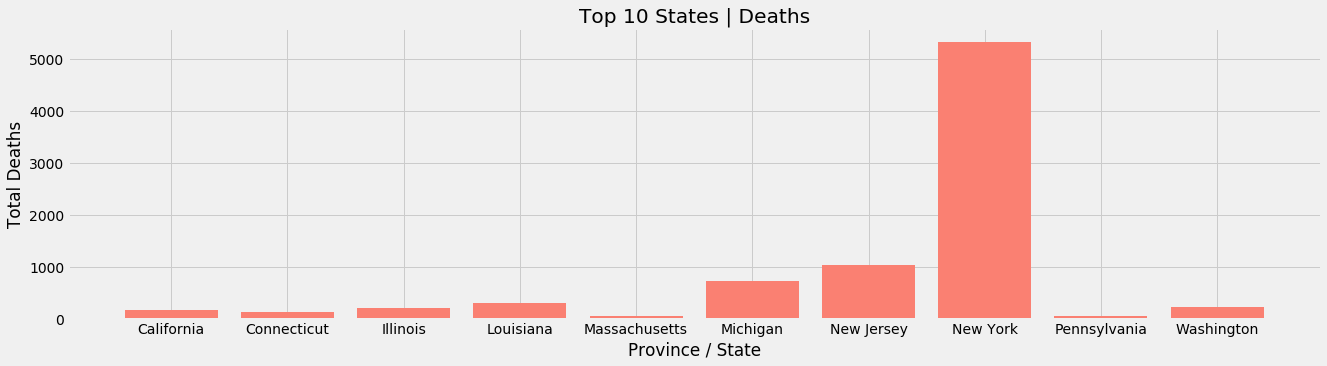

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Province_State','Total Deaths', data=us_top10_deaths.groupby('Province_State', as_index=False).sum(), color='salmon')
plt.title('Top 10 States | Deaths')
plt.xlabel('Province / State')
plt.ylabel('Total Deaths');

In [29]:
usdeaths_covid_final = usdeaths_covid.groupby('Province_State').agg( {'Total Deaths': ['sum']} )
usdeaths_covid_final

,Total Deaths
,sum
Province_State,
Alabama,64
Alaska,6
American Samoa,0
Arizona,73
Arkansas,18
California,432
Colorado,179
Connecticut,277


In [30]:
usdeaths_covid_final[('Total Deaths', 'sum')].describe()

count      58.000000
mean      219.327586
std       737.373941
min         0.000000
25%        10.500000
50%        42.500000
75%       165.250000
max      5489.000000
Name: (Total Deaths, sum), dtype: float64

In [31]:
us_merge = pd.merge(uscases_covid_final, usdeaths_covid_final, on='Province_State')
us_merge

,Total Cases,Total Deaths
,sum,sum
Province_State,,
Alabama,2169,64
Alaska,213,6
American Samoa,0,0
Arizona,2870,73
Arkansas,946,18
California,17351,432
Colorado,5429,179
Connecticut,7781,277


In [32]:
def death_rate(row):
    death_rate = row['Total Deaths']/row['Total Cases']
    return death_rate

In [33]:
us_merge['Death Rate'] = us_merge.apply(death_rate, axis=1)
us_merge

,Total Cases,Total Deaths,Death Rate
,sum,sum,
Province_State,,,
Alabama,2169,64,0.029507
Alaska,213,6,0.028169
American Samoa,0,0,NaN
Arizona,2870,73,0.025436
Arkansas,946,18,0.019027
California,17351,432,0.024898
Colorado,5429,179,0.032971
Connecticut,7781,277,0.035600


In [34]:
us_merge_final = us_merge.sort_values('Death Rate', ascending=False).head(10)
us_merge_final

,Total Cases,Total Deaths,Death Rate
,sum,sum,
Province_State,,,
Northern Mariana Islands,6,1,0.166667
Kentucky,1149,65,0.056571
Washington,8692,400,0.046019
Oklahoma,1474,67,0.045455
Michigan,18970,845,0.044544
Puerto Rico,573,23,0.040140
Vermont,575,23,0.040000
New York,139875,5489,0.039242


In [35]:
us_merge_final['Death Rate'].mean()

0.055167102000996296

In [36]:
us_merge_final['Death Rate'].max()

0.16666666666666666

In [37]:
us_merge_final['Death Rate'].min()

0.03574060427413412

In [38]:
ohio_covid = pd.read_csv('COVID_ohio.csv')
ohio_covid.drop(ohio_covid.tail(1).index,inplace=True)
ohio_covid.drop(['Date Of Death'], axis=1, inplace=True)
ohio_covid

,County,Sex,Age Range,Onset Date,Case Count,Death Count,Hospitalized Count
0,Adams,Male,40-49,3/29/2020,1,0,0
1,Adams,Male,50-59,3/30/2020,1,0,0
2,Allen,Female,30-39,3/21/2020,1,0,1
3,Allen,Female,40-49,3/23/2020,1,0,0
4,Allen,Female,40-49,3/25/2020,1,0,0
...,...,...,...,...,...,...,...
3458,Wyandot,Male,50-59,3/26/2020,1,0,0
3459,Wyandot,Male,50-59,3/29/2020,1,0,0
3460,Wyandot,Male,50-59,3/31/2020,1,0,0
3461,Wyandot,Male,60-69,3/12/2020,1,0,1


In [39]:
ohio_covid_final = ohio_covid.groupby('County').agg( {'Case Count': ['count'], 'Death Count': ['sum']} )
ohio_covid_final

,Case Count,Death Count
,count,sum
County,,
Adams,2,0
Allen,22,1
Ashland,3,0
Ashtabula,19,0
Athens,3,1
...,...,...
Washington,24,0
Wayne,29,0


In [40]:
ohio_covid_final[('Case Count', 'count')].mean()

41.72289156626506

In [41]:
# Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)
global_adult_mortality1 = pd.read_csv('adult_mortality_global.csv')
global_adult_mortality = global_adult_mortality1.drop_duplicates(subset='Country', keep='first')
global_adult_mortality

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
17,Albania,2016,96,122,71
34,Algeria,2016,95,106,84
51,Angola,2016,238,275,202
68,Antigua and Barbuda,2016,120,137,104
...,...,...,...,...,...
3026,Venezuela (Bolivarian Republic of),2016,157,217,93
3043,Viet Nam,2016,125,182,66
3060,Yemen,2016,221,244,199
3077,Zambia,2016,286,324,250


In [42]:
global_adult_mortality_final = global_adult_mortality.rename(columns={'Country': 'Country/Region'})
global_adult_mortality_final.drop(['Year', ' Male', ' Female'], axis=1, inplace=True)
global_adult_mortality_final

,Country/Region,Both sexes
0,Afghanistan,245
17,Albania,96
34,Algeria,95
51,Angola,238
68,Antigua and Barbuda,120
...,...,...
3026,Venezuela (Bolivarian Republic of),157
3043,Viet Nam,125
3060,Yemen,221
3077,Zambia,286


In [43]:
# Imported from the World Health Organization
global_health_statistics1 = pd.read_excel('health_population_data.xlsx')
global_health_statistics1.drop(['Country Code', 'Region Code', 'Survey Type'], axis=1, inplace=True)
global_health_statistics2 = global_health_statistics1.loc[global_health_statistics1['Subsample'] == 'Total']

In [44]:
# I am trying to obtain the most recent estimate of total population by filtering the dataset 'Subsample' to 'Total' and erasing the duplicate up to the last reported total population.
global_health_statistics = global_health_statistics2.drop_duplicates(subset='Country name', keep='last')
global_health_statistics

,Country name,Region,Year of Survey,Subsample,Total population,"Children, aged 0-14","Youth, aged 15-24","Adult, aged 25-64","Elderly, aged 65+",Urban Population (% of total Population),...,"Real Median Monthly Wages in USD (base 2010), PPP adjusted","Median Earnings for wage workers per month in agriculture, local nominal currenc","Median Earnings for wage workers per month in industry, local nominal currency","Median Earnings for wage workers per month in service, local nominal currency",Female to Male gender wage gap,Public to Private wage gap,No Education,Primary Education,Secondary Education,Post Secondary Education
15,Afghanistan,South Asia,2011,Total,2.695480e+07,0.484071,0.189436,0.301949,0.024543,0.227420,...,NaN,NaN,NaN,NaN,NaN,NaN,0.696500,0.158643,0.085555,0.059302
24,Angola,Sub-Saharan Africa,2008,Total,1.636788e+07,0.480743,0.194388,0.299872,0.024997,0.525395,...,NaN,NaN,NaN,NaN,NaN,NaN,0.229123,0.659513,0.092023,0.019341
75,Albania,Europe and Central Asia,2012,Total,2.802801e+06,0.203159,0.178950,0.502348,0.115542,0.540261,...,5284.041504,NaN,NaN,NaN,1.000000,1.166667,0.001542,0.055539,0.587063,0.355855
164,Armenia,Europe and Central Asia,2016,Total,2.983174e+06,0.190215,0.129134,0.549501,0.131150,0.625432,...,589.676880,72692.304688,124615.390625,98653.84375,0.625000,0.650000,0.002449,0.001326,0.411128,0.585097
223,Azerbaijan,Europe and Central Asia,2015,Total,8.332984e+06,0.206323,0.161189,0.550156,0.082332,0.586929,...,NaN,200.000000,300.000000,200.00000,0.596154,0.625000,0.011621,0.202935,0.785444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,Vanuatu,East Asia and Pacific,2010,Total,2.498546e+05,0.397614,0.170540,0.398710,0.033137,0.258397,...,93.384666,11152.500000,10237.500000,11730.00000,0.899333,NaN,NaN,NaN,NaN,NaN
6669,"Yemen, Rep.",Middle East and North Africa,2005,Total,2.005296e+07,0.444756,0.222869,0.298030,0.034345,0.273824,...,NaN,0.000000,0.000000,18200.00000,1.379310,NaN,0.576371,0.053683,0.270260,0.099687
6753,South Africa,Sub-Saharan Africa,2017,Total,5.562049e+07,0.277632,0.185342,0.480803,0.056223,0.637094,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033600,0.090358,0.559707,0.316335
6807,Zambia,Sub-Saharan Africa,2015,Total,1.547391e+07,0.354556,0.243862,0.372877,0.028705,0.418269,...,NaN,NaN,NaN,NaN,NaN,NaN,0.182576,0.222201,0.467939,0.127284


In [45]:
global_health_statistics_final = global_health_statistics.rename(columns={'Country name': 'Country/Region'})
global_health_statistics_final

,Country/Region,Region,Year of Survey,Subsample,Total population,"Children, aged 0-14","Youth, aged 15-24","Adult, aged 25-64","Elderly, aged 65+",Urban Population (% of total Population),...,"Real Median Monthly Wages in USD (base 2010), PPP adjusted","Median Earnings for wage workers per month in agriculture, local nominal currenc","Median Earnings for wage workers per month in industry, local nominal currency","Median Earnings for wage workers per month in service, local nominal currency",Female to Male gender wage gap,Public to Private wage gap,No Education,Primary Education,Secondary Education,Post Secondary Education
15,Afghanistan,South Asia,2011,Total,2.695480e+07,0.484071,0.189436,0.301949,0.024543,0.227420,...,NaN,NaN,NaN,NaN,NaN,NaN,0.696500,0.158643,0.085555,0.059302
24,Angola,Sub-Saharan Africa,2008,Total,1.636788e+07,0.480743,0.194388,0.299872,0.024997,0.525395,...,NaN,NaN,NaN,NaN,NaN,NaN,0.229123,0.659513,0.092023,0.019341
75,Albania,Europe and Central Asia,2012,Total,2.802801e+06,0.203159,0.178950,0.502348,0.115542,0.540261,...,5284.041504,NaN,NaN,NaN,1.000000,1.166667,0.001542,0.055539,0.587063,0.355855
164,Armenia,Europe and Central Asia,2016,Total,2.983174e+06,0.190215,0.129134,0.549501,0.131150,0.625432,...,589.676880,72692.304688,124615.390625,98653.84375,0.625000,0.650000,0.002449,0.001326,0.411128,0.585097
223,Azerbaijan,Europe and Central Asia,2015,Total,8.332984e+06,0.206323,0.161189,0.550156,0.082332,0.586929,...,NaN,200.000000,300.000000,200.00000,0.596154,0.625000,0.011621,0.202935,0.785444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,Vanuatu,East Asia and Pacific,2010,Total,2.498546e+05,0.397614,0.170540,0.398710,0.033137,0.258397,...,93.384666,11152.500000,10237.500000,11730.00000,0.899333,NaN,NaN,NaN,NaN,NaN
6669,"Yemen, Rep.",Middle East and North Africa,2005,Total,2.005296e+07,0.444756,0.222869,0.298030,0.034345,0.273824,...,NaN,0.000000,0.000000,18200.00000,1.379310,NaN,0.576371,0.053683,0.270260,0.099687
6753,South Africa,Sub-Saharan Africa,2017,Total,5.562049e+07,0.277632,0.185342,0.480803,0.056223,0.637094,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033600,0.090358,0.559707,0.316335
6807,Zambia,Sub-Saharan Africa,2015,Total,1.547391e+07,0.354556,0.243862,0.372877,0.028705,0.418269,...,NaN,NaN,NaN,NaN,NaN,NaN,0.182576,0.222201,0.467939,0.127284


In [46]:
global_health_statistics.columns

Index(['Country name', 'Region', 'Year of Survey', 'Subsample',
       'Total population', 'Children, aged 0-14', 'Youth, aged 15-24',
       'Adult, aged 25-64', 'Elderly, aged 65+',
       'Urban Population (% of total Population)',
       ' Working Age Population, aged 15-64 (% of total Pop.)',
       'Dependency Rate, all compared to 15-64',
       'Youth Dependency Rate, younger than 15 compared to 15-64',
       'Old Age Dependency Rate, older than 64 compared to 15-64',
       'Labor Force, aged 15-64', 'Labor Force Participation Rate, aged 15-64',
       'Female Labor Force Participation Rate, aged 15-64',
       'Not in labor force or education rate among youth, aged 15-24',
       'Employment to Population Ratio, aged 15-64',
       'Share of workers (aged 15-64) with more than one jobs in last week',
       'Employment to Labor Force Ratio, aged 15-64 ',
       'Unemployment Rate, aged 15-64',
       'Youth Employment to Labor Force Ratio, aged 15-24',
       'Youth Unemploy

In [47]:
global_health_statistics_final.drop(global_health_statistics_final.columns.difference(['Country/Region', 'Total population', 'Elderly, aged 65+', ' No Education']), axis=1, inplace=True)
global_health_statistics_final

,Country/Region,Total population,"Elderly, aged 65+",No Education
15,Afghanistan,2.695480e+07,0.024543,0.696500
24,Angola,1.636788e+07,0.024997,0.229123
75,Albania,2.802801e+06,0.115542,0.001542
164,Armenia,2.983174e+06,0.131150,0.002449
223,Azerbaijan,8.332984e+06,0.082332,0.011621
...,...,...,...,...
6652,Vanuatu,2.498546e+05,0.033137,NaN
6669,"Yemen, Rep.",2.005296e+07,0.034345,0.576371
6753,South Africa,5.562049e+07,0.056223,0.033600
6807,Zambia,1.547391e+07,0.028705,0.182576


In [48]:
# I am using a pivot table to confirm that each country has only one record of total population after filtering the data.
global_health_statistics.pivot_table(columns='Country name', index='Year of Survey',
                                    values='Total population')

Country name,Afghanistan,Albania,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,Bhutan,...,Ukraine,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
Year of Survey,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243855.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23559494.0,NaN,25625384.0,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005296e+07,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,1.636788e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
global_health_gdp = pd.read_csv('health_percentageofgdp.csv')
global_health_gdp.drop(global_health_gdp.columns.difference(['Country', '2017']), axis=1, inplace=True)
global_health_gdp

,Country,2017
0,Afghanistan,11.8
1,Algeria,6.4
2,Andorra,10.3
3,Angola,2.8
4,Antigua and Barbuda,4.5
...,...,...
185,Venezuela (Bolivarian Republic of),1.2
186,Viet Nam,5.5
187,Yemen,NaN
188,Zambia,4.5


In [50]:
global_health_gdp_final = global_health_gdp.rename(columns={'Country': 'Country/Region'})
global_health_gdp_final

,Country/Region,2017
0,Afghanistan,11.8
1,Algeria,6.4
2,Andorra,10.3
3,Angola,2.8
4,Antigua and Barbuda,4.5
...,...,...
185,Venezuela (Bolivarian Republic of),1.2
186,Viet Nam,5.5
187,Yemen,NaN
188,Zambia,4.5


In [51]:
global_merge = pd.merge(globalcases_covid_final, globaldeaths_covid_final, on='Country/Region')
global_merge

,Total Cases,Total Deaths
,sum,sum
Country/Region,,
Afghanistan,423,14
Albania,383,22
Algeria,1468,193
Andorra,545,22
Angola,17,2
...,...,...
Vietnam,249,0
West Bank and Gaza,261,1


In [52]:
global_merge_final = pd.merge(global_merge, globalrecovered_covid_final, on='Country/Region')
global_merge_final

,Total Cases,Total Deaths,Total Recovered
,sum,sum,sum
Country/Region,,,
Afghanistan,423,14,18
Albania,383,22,131
Algeria,1468,193,113
Andorra,545,22,39
Angola,17,2,2
...,...,...,...
Vietnam,249,0,123
West Bank and Gaza,261,1,42


In [53]:
def total_recovered(row):
    total_recovered = row['Total Recovered']/row['Total Cases']
    return total_recovered

In [54]:
global_merge_final['Recovery Rate'] = global_merge_final.apply(total_recovered, axis=1)
global_merge_final['Death Rate'] = global_merge_final.apply(death_rate, axis=1)
global_merge_final

,Total Cases,Total Deaths,Total Recovered,Recovery Rate,Death Rate
,sum,sum,sum,,
Country/Region,,,,,
Afghanistan,423,14,18,0.042553,0.033097
Albania,383,22,131,0.342037,0.057441
Algeria,1468,193,113,0.076975,0.131471
Andorra,545,22,39,0.071560,0.040367
Angola,17,2,2,0.117647,0.117647
...,...,...,...,...,...
Vietnam,249,0,123,0.493976,0.000000
West Bank and Gaza,261,1,42,0.160920,0.003831


In [55]:
# Showing countries who have spent > five percent of their GDP on health improvements in 2017.
global_health_gdp_final.loc[global_health_gdp_final['2017'] > 5].sort_values('2017', ascending=False)

,Country/Region,2017
181,United States,17.1
175,Tuvalu,17.1
105,Marshall Islands,16.4
151,Sierra Leone,13.4
109,Micronesia (Federated States of),12.4
...,...,...
34,China,5.2
27,Cabo Verde,5.2
147,Saudi Arabia,5.2
138,Romania,5.2


In [56]:
# The following graph datset is a dataset I created myself, listing the continent location for each country.
# Because the majority of Russia's population resides in the Europe side, I labeled Russia's continent as Europe instead of Asia.
# The continent "Other" is because two of the "Country" labels are actually the cruise ships heavily infected with COVID-19.
continents = pd.read_excel('continents.xlsx')
continents

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
183,Vietnam,Asia
184,West Bank and Gaza,Asia
185,Western Sahara,Africa
186,Zambia,Africa


In [57]:
final_continents = continents.rename(columns={'Country': 'Country/Region'})
final_continents

,Country/Region,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
183,Vietnam,Asia
184,West Bank and Gaza,Asia
185,Western Sahara,Africa
186,Zambia,Africa


In [58]:
dfs = [final_continents, global_adult_mortality_final, global_health_statistics_final, global_merge_final, global_health_gdp_final]

In [59]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='Country/Region', how='outer'), dfs)
df_final

C:\Users\katie\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Country/Region,Continent,Both sexes,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",2017
0,Afghanistan,Asia,245.0,2.695480e+07,0.024543,0.696500,423.0,14.0,18.0,0.042553,0.033097,11.8
1,Albania,Europe,96.0,2.802801e+06,0.115542,0.001542,383.0,22.0,131.0,0.342037,0.057441,NaN
2,Algeria,Africa,95.0,NaN,NaN,NaN,1468.0,193.0,113.0,0.076975,0.131471,6.4
3,Andorra,Europe,NaN,NaN,NaN,NaN,545.0,22.0,39.0,0.071560,0.040367,10.3
4,Angola,Africa,238.0,1.636788e+07,0.024997,0.229123,17.0,2.0,2.0,0.117647,0.117647,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Yemen, Rep.",NaN,NaN,2.005296e+07,0.034345,0.576371,NaN,NaN,NaN,NaN,NaN,NaN
223,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
224,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
225,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6


In [60]:
df_final.columns

Index([          'Country/Region',                'Continent',
                    ' Both sexes',         'Total population',
              'Elderly, aged 65+',            ' No Education',
           ('Total Cases', 'sum'),    ('Total Deaths', 'sum'),
       ('Total Recovered', 'sum'),      ('Recovery Rate', ''),
               ('Death Rate', ''),                     '2017'],
      dtype='object')

In [61]:
global_final = df_final.rename(columns={' Both sexes': 'Adult Mortality Rate', '2017': 'Percentage of GDP on Health'})
global_final

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
0,Afghanistan,Asia,245.0,2.695480e+07,0.024543,0.696500,423.0,14.0,18.0,0.042553,0.033097,11.8
1,Albania,Europe,96.0,2.802801e+06,0.115542,0.001542,383.0,22.0,131.0,0.342037,0.057441,NaN
2,Algeria,Africa,95.0,NaN,NaN,NaN,1468.0,193.0,113.0,0.076975,0.131471,6.4
3,Andorra,Europe,NaN,NaN,NaN,NaN,545.0,22.0,39.0,0.071560,0.040367,10.3
4,Angola,Africa,238.0,1.636788e+07,0.024997,0.229123,17.0,2.0,2.0,0.117647,0.117647,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Yemen, Rep.",NaN,NaN,2.005296e+07,0.034345,0.576371,NaN,NaN,NaN,NaN,NaN,NaN
223,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
224,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
225,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6


In [62]:
global_final_model = global_final.fillna(0).sort_values('Percentage of GDP on Health', ascending=False).round(4)
global_final_model

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
174,Tuvalu,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,17.1
109,Marshall Islands,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,16.4
152,Sierra Leone,Africa,389.0,5.054847e+06,0.0412,0.0031,6.0,0.0,0.0,0.0000,0.0000,13.4
113,Micronesia (Federated States of),Australia / Oceania,164.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Western Sahara,Africa,0.0,0.000000e+00,0.0000,0.0000,4.0,0.0,0.0,0.0000,0.0000,0.0
81,Iran,Asia,0.0,0.000000e+00,0.0000,0.0000,62589.0,3872.0,27039.0,0.4320,0.0619,0.0
75,Holy See,Europe,0.0,0.000000e+00,0.0000,0.0000,7.0,0.0,0.0,0.0000,0.0000,0.0
141,Russia,Europe,0.0,0.000000e+00,0.0000,0.0000,7497.0,58.0,494.0,0.0659,0.0077,0.0


In [63]:
global_final_model['Continent'] = global_final_model['Continent'].replace(0, 'Other')
global_final_model

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
174,Tuvalu,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,17.1
109,Marshall Islands,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,16.4
152,Sierra Leone,Africa,389.0,5.054847e+06,0.0412,0.0031,6.0,0.0,0.0,0.0000,0.0000,13.4
113,Micronesia (Federated States of),Australia / Oceania,164.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Western Sahara,Africa,0.0,0.000000e+00,0.0000,0.0000,4.0,0.0,0.0,0.0000,0.0000,0.0
81,Iran,Asia,0.0,0.000000e+00,0.0000,0.0000,62589.0,3872.0,27039.0,0.4320,0.0619,0.0
75,Holy See,Europe,0.0,0.000000e+00,0.0000,0.0000,7.0,0.0,0.0,0.0000,0.0000,0.0
141,Russia,Europe,0.0,0.000000e+00,0.0000,0.0000,7497.0,58.0,494.0,0.0659,0.0077,0.0


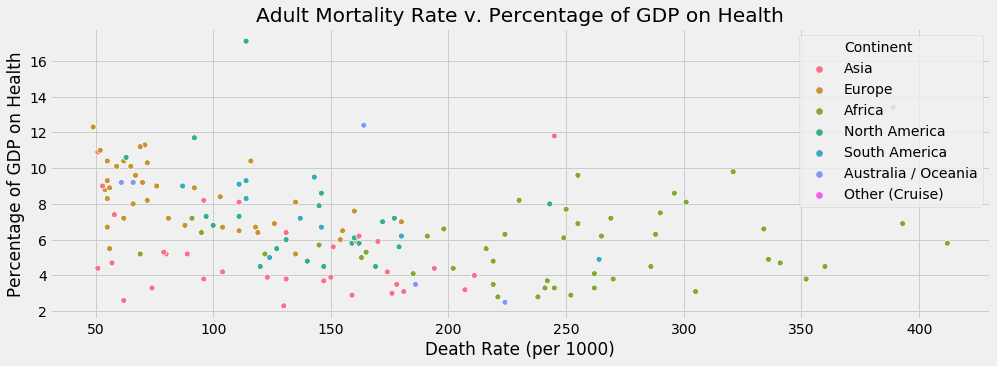

In [64]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Adult Mortality Rate', y='Percentage of GDP on Health', hue='Continent', data=global_final)
plt.xlabel('Death Rate (per 1000)')
plt.ylabel('Percentage of GDP on Health')
plt.title('Adult Mortality Rate v. Percentage of GDP on Health');

In [65]:
### LINEAR REGRESSION

In [66]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
X = global_final_model[['Percentage of GDP on Health']]
y = global_final_model[('Total Deaths', 'sum')]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [69]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model.coef_, model.intercept_

(array([130.73658996]), -361.92950035358064)

In [71]:
unseen_x = pd.DataFrame({'Percentage of GDP on Health': [3, 4, 6, 9, 13]})
unseen_x

,Percentage of GDP on Health
0,3
1,4
2,6
3,9
4,13


In [72]:
unseen_y = model.predict(unseen_x)
unseen_y

array([  30.28026953,  161.01685949,  422.49003941,  814.69980928,
       1337.64616912])

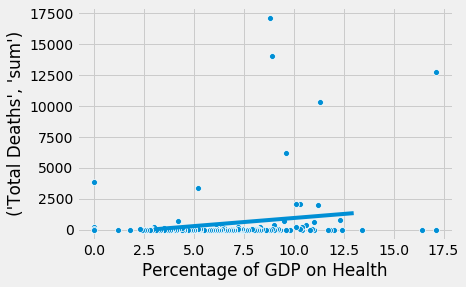

In [73]:
sns.scatterplot(x='Percentage of GDP on Health', y=('Total Deaths', 'sum'), data=global_final_model)
sns.lineplot(x=unseen_x['Percentage of GDP on Health'], y=unseen_y);

In [74]:
model.score(X_test, y_test)

0.03180261599621703

In [75]:
## CLASSIFICATION

In [76]:
feature_cols = ['Adult Mortality Rate', 'Elderly, aged 65+', ('Total Cases', 'sum'), ('Total Deaths', 'sum'), 
                ('Total Recovered', 'sum'), 'Percentage of GDP on Health']
target_col = 'Continent'
X = global_final_model[feature_cols]
y = global_final_model[target_col]

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [78]:
model = GaussianNB()

In [79]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
model.score(Xtest, ytest)

0.45614035087719296

In [81]:
new_country = {'Adult Mortality Rate': 244, 'Elderly, aged 65+': 0.05, 
               ('Total Cases', 'sum'): 240, ('Total Deaths', 'sum'): 44, ('Total Recovered', 'sum'): 500,
               'Percentage of GDP on Health': 6}
X_new = pd.DataFrame([new_country])
X_new

,Adult Mortality Rate,"Elderly, aged 65+","(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)",Percentage of GDP on Health
0,244,0.05,240,44,500,6


In [82]:
model.predict(X_new)

array(['South America'], dtype='<U19')

In [83]:
### DECISION TREE

In [84]:
decision_tree = DecisionTreeClassifier(random_state=12)

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [86]:
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [87]:
decision_tree.score(Xtest, ytest)

0.47368421052631576

In [88]:
decision_tree.predict(X_new)

array(['North America'], dtype=object)

In [89]:
### DECISION TREE, ADDING MORE VARIABLES

In [90]:
feature_cols = ['Adult Mortality Rate', 'Total population', 'Elderly, aged 65+', ('Total Cases', 'sum'), 
                ('Total Deaths', 'sum'), ('Death Rate', ''), 'Percentage of GDP on Health']
target_col = 'Continent'
X = global_final_model[feature_cols]
y = global_final_model[target_col]

In [91]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [92]:
decision_tree = DecisionTreeClassifier(random_state=12)

In [93]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [94]:
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [95]:
new_country = {'Adult Mortality Rate': 244, 'Total population': 6.07e+06, 'Elderly, aged 65+': 0.05, 
               ('Total Cases', 'sum'): 240, ('Total Deaths', 'sum'): 44, ('Death Rate', ''):0.0045, 'Percentage of GDP on Health': 6}
X_new = pd.DataFrame([new_country])
X_new

,Adult Mortality Rate,Total population,"Elderly, aged 65+","(Total Cases, sum)","(Total Deaths, sum)","(Death Rate, )",Percentage of GDP on Health
0,244,6070000.0,0.05,240,44,0.0045,6


In [96]:
decision_tree.score(Xtest, ytest)

0.5087719298245614

In [97]:
decision_tree.predict(X_new)

array(['North America'], dtype=object)

In [98]:
### NEW LINEAR, DROPPING NAs

In [99]:
global_final_modelv1 = global_final.dropna().sort_values('Percentage of GDP on Health', ascending=False).round(4)
global_final_modelv1

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
152,Sierra Leone,Africa,389.0,5.054847e+06,0.0412,0.0031,6.0,0.0,0.0,0.0000,0.0000,13.4
0,Afghanistan,Asia,245.0,2.695480e+07,0.0245,0.6965,423.0,14.0,18.0,0.0426,0.0331,11.8
7,Armenia,Europe,116.0,2.983174e+06,0.1312,0.0024,853.0,8.0,87.0,0.1020,0.0094,10.4
158,South Sudan,Africa,321.0,8.396608e+06,0.0314,0.7426,2.0,0.0,0.0,0.0000,0.0000,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Pakistan,Asia,159.0,1.639042e+08,0.0410,0.4812,4035.0,57.0,429.0,0.1063,0.0141,2.9
63,Gabon,Africa,221.0,1.312467e+06,0.0383,0.0979,30.0,1.0,1.0,0.0333,0.0333,2.8
4,Angola,Africa,238.0,1.636788e+07,0.0250,0.2291,17.0,2.0,2.0,0.1176,0.1176,2.8
133,Papua New Guinea,Australia / Oceania,224.0,6.982725e+06,0.0282,0.0220,2.0,0.0,0.0,0.0000,0.0000,2.5


In [100]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
X = global_final_modelv1[['Elderly, aged 65+']]
y = global_final_modelv1[('Total Cases', 'sum')]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [103]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
model.coef_, model.intercept_

(array([326060.84621887]), -14343.325278928456)

In [105]:
unseen_x = pd.DataFrame({'Elderly, aged 65+': [0.0412, 0.0612, 0.05, 0.1412, 0.021]})
unseen_x

,"Elderly, aged 65+"
0,0.0412
1,0.0612
2,0.0500
3,0.1412
4,0.0210


In [106]:
unseen_y = model.predict(unseen_x)
unseen_y

array([ -909.61841471,  5611.59850967,  1959.71703201, 31696.46620718,
       -7496.04750833])

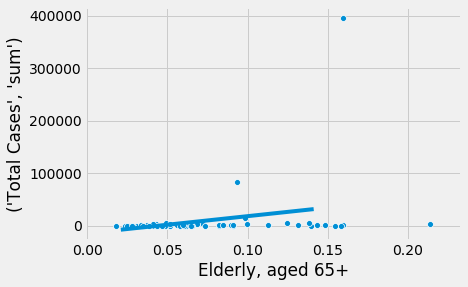

In [107]:
sns.scatterplot(x='Elderly, aged 65+', y=('Total Cases', 'sum'), data=global_final_modelv1)
sns.lineplot(x=unseen_x['Elderly, aged 65+'], y=unseen_y);

In [108]:
model.score(X_test, y_test)

0.0815292155447408